In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1/ Working with real world data

In [3]:
file_path = "../data/WHS8_110.csv"
measles_1 = pd.read_csv(file_path)
# Column name incorrect
measles_1.head()

,Unnamed: 0,Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%),Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%).1,Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%).2,Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%).3,Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%).4,Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%).5,Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%).6,Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%).7,Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%).8,...,Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%).28,Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%).29,Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%).30,Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%).31,Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%).32,Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%).33,Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%).34,Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%).35,Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%).36,Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%).37
0,Country,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
1,Afghanistan,62,62,62,60,57,59,64,62,60,...,22,34,31,14,14,14,9,8,NaN,11
2,Albania,96,96,97,98,99,98,99,99,97,...,96,96,96,96,96,96,96,93,90,90
3,Algeria,88,94,95,95,95,95,95,95,92,...,82,81,73,67,68,NaN,NaN,NaN,NaN,NaN
4,Andorra,99,97,96,96,95,98,99,99,98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
measles_1 = pd.read_csv(file_path, header=[0, 1])
# Multilevel column name
measles_1.head()


Unnamed: 0_level_0  \
             Country   
0        Afghanistan   
1            Albania   
2            Algeria   
3            Andorra   
4             Angola   

  Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%)  \
                                                                                      2017   
0                                                 62                                         
1                                                 96                                         
2                                                 88                                         
3                                                 99                                         
4                                                 42                                         

                                                   ...                    \
   2016  2015  2014  2013  2012  2011  2010  2009  ...  1989  1988  1987   
0    62    62    60    57    59    64    62    60  ...    22    34    31   
1    96    97    98    99    98    99    99    97  ...    96    96    96   
2    94    95    95    95    95    95    95    92  ...    82    81    73   
3    97    96    96    95    98    99    99    98  ...   NaN   NaN   NaN   
4    45    51    56    59    67    60    67    53  ...    48    56    55   

                                             
   1986  1985  1984  1983  1982  1981  1980  
0    14    14    14     9     8   NaN    11  
1    96    96    96    96    93    90    90  
2    67    68   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4    44    44    35    26   NaN   NaN   NaN  

[5 rows x 39 columns]

In [5]:
measles_1 = pd.read_csv(file_path, header=[0, 1], index_col=0)
# Indexed at country name
measles_1.head()

Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%)  \
Country                                                                                         2017   
Afghanistan                                                 62                                         
Albania                                                     96                                         
Algeria                                                     88                                         
Andorra                                                     99                                         
Angola                                                      42                                         

                                                                   ...        \
Country      2016  2015  2014  2013  2012  2011  2010  2009  2008  ...  1989   
Afghanistan    62    62    60    57    59    64    62    60    59  ...    22   
Albania        96    97    98    99    98    99    99    97    98  ...    96   
Algeria        94    95    95    95    95    95    95    92    88  ...    82   
Andorra        97    96    96    95    98    99    99    98    98  ...   NaN   
Angola         45    51    56    59    67    60    67    53    57  ...    48   

                                                                   
Country      1988  1987  1986  1985  1984  1983  1982  1981  1980  
Afghanistan    34    31    14    14    14     9     8   NaN    11  
Albania        96    96    96    96    96    96    93    90    90  
Algeria        81    73    67    68   NaN   NaN   NaN   NaN   NaN  
Andorra       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Angola         56    55    44    44    35    26   NaN   NaN   NaN  

[5 rows x 38 columns]

In [6]:
measles_1.columns
# name too long and there are space infront of year
# Index type is immutable so we can't just change the value within the index
# Index have to be unique

MultiIndex(levels=[['Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%)'], [' 1980', ' 1981', ' 1982', ' 1983', ' 1984', ' 1985', ' 1986', ' 1987', ' 1988', ' 1989', ' 1990', ' 1991', ' 1992', ' 1993', ' 1994', ' 1995', ' 1996', ' 1997', ' 1998', ' 1999', ' 2000', ' 2001', ' 2002', ' 2003', ' 2004', ' 2005', ' 2006', ' 2007', ' 2008', ' 2009', ' 2010', ' 2011', ' 2012', ' 2013', ' 2014', ' 2015', ' 2016', ' 2017']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]],
           names=[None, 'Country'])

In [7]:
measles_1.columns.names = ["Dose", "Year"]
measles_1.head()

Dose        Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%)  \
Year                                                                                            2017   
Afghanistan                                                 62                                         
Albania                                                     96                                         
Algeria                                                     88                                         
Andorra                                                     99                                         
Angola                                                      42                                         

Dose                                                               ...        \
Year         2016  2015  2014  2013  2012  2011  2010  2009  2008  ...  1989   
Afghanistan    62    62    60    57    59    64    62    60    59  ...    22   
Albania        96    97    98    99    98    99    99    97    98  ...    96   
Algeria        94    95    95    95    95    95    95    92    88  ...    82   
Andorra        97    96    96    95    98    99    99    98    98  ...   NaN   
Angola         45    51    56    59    67    60    67    53    57  ...    48   

Dose                                                               
Year         1988  1987  1986  1985  1984  1983  1982  1981  1980  
Afghanistan    34    31    14    14    14     9     8   NaN    11  
Albania        96    96    96    96    96    96    93    90    90  
Algeria        81    73    67    68   NaN   NaN   NaN   NaN   NaN  
Andorra       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Angola         56    55    44    44    35    26   NaN   NaN   NaN  

[5 rows x 38 columns]

In [8]:
measles_1.columns = measles_1.columns.set_levels(["M1"], level=0)
measles_1.columns

MultiIndex(levels=[['M1'], [' 1980', ' 1981', ' 1982', ' 1983', ' 1984', ' 1985', ' 1986', ' 1987', ' 1988', ' 1989', ' 1990', ' 1991', ' 1992', ' 1993', ' 1994', ' 1995', ' 1996', ' 1997', ' 1998', ' 1999', ' 2000', ' 2001', ' 2002', ' 2003', ' 2004', ' 2005', ' 2006', ' 2007', ' 2008', ' 2009', ' 2010', ' 2011', ' 2012', ' 2013', ' 2014', ' 2015', ' 2016', ' 2017']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]],
           names=['Dose', 'Year'])

In [9]:
measles_1.columns = measles_1.columns.set_levels([int(i.strip()) for i in measles_1.columns.levels[1]], level=1)
measles_1.columns

MultiIndex(levels=[['M1'], [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]],
           names=['Dose', 'Year'])

In [10]:
measles_1["M1"].head()

Year,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
Afghanistan,62,62,62,60,57,59,64,62,60,59,...,22,34,31,14,14,14,9,8,NaN,11
Albania,96,96,97,98,99,98,99,99,97,98,...,96,96,96,96,96,96,96,93,90,90
Algeria,88,94,95,95,95,95,95,95,92,88,...,82,81,73,67,68,NaN,NaN,NaN,NaN,NaN
Andorra,99,97,96,96,95,98,99,99,98,98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,42,45,51,56,59,67,60,67,53,57,...,48,56,55,44,44,35,26,NaN,NaN,NaN


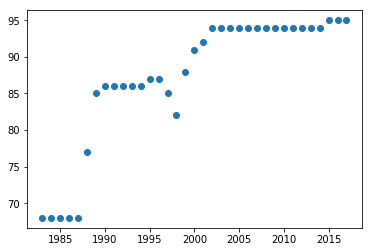

In [37]:
plt.scatter(measles_1.loc["Australia"]["M1"].index, measles_1.loc["Australia"]["M1"])

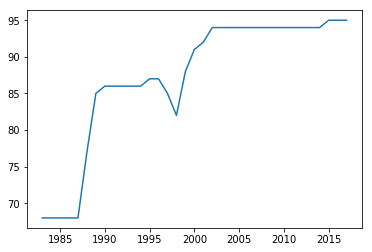

In [29]:
plt.plot(measles_1.loc["Australia"]["M1"].index, measles_1.loc["Australia"]["M1"])

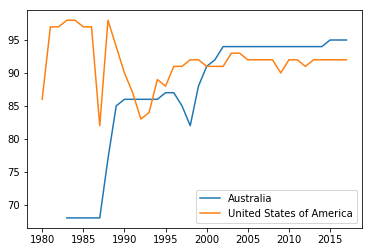

In [47]:
plt.plot(measles_1.loc["Australia"]["M1"].index, measles_1.loc["Australia"]["M1"])
plt.plot(measles_1.loc["United States of America"]["M1"])
plt.legend()

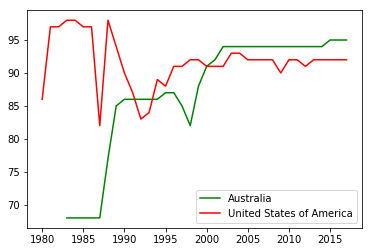

In [48]:
plt.plot(measles_1.loc["Australia"]["M1"].index, measles_1.loc["Australia"]["M1"], color='g')
plt.plot(measles_1.loc["United States of America"]["M1"], color='r')
plt.legend()

In [50]:
combined = measles_1.loc[["United States of America", "Australia"]]
combined.head()

Dose                       M1                                               \
Year                     2017 2016 2015 2014 2013 2012 2011 2010 2009 2008   
United States of America   92   92   92   92   92   91   92   92   90   92   
Australia                  95   95   95   94   94   94   94   94   94   94   

Dose                      ...                                               \
Year                      ... 1989 1988 1987 1986 1985 1984 1983 1982 1981   
United States of America  ...   94   98   82   97   97   98   98   97   97   
Australia                 ...   85   77   68   68   68   68   68  NaN  NaN   

Dose                           
Year                     1980  
United States of America   86  
Australia                 NaN  

[2 rows x 38 columns]

In [60]:
combined.loc["Australia"].max()

TypeError: '>=' not supported between instances of 'numpy.ndarray' and 'str'

In [59]:
combined.max()

Dose  Year
M1    2017    95
      2016    95
      2015    95
      2014    94
      2013    94
      2012    94
      2011    94
      2010    94
      2009    94
      2008    94
      2007    94
      2006    94
      2005    94
      2004    94
      2003    94
      2002    94
      2001    92
      2000    91
      1999    92
      1998    92
      1997    91
      1996    91
      1995    88
      1994    89
      1993    86
      1992    86
      1991    87
      1990    90
      1989    94
      1988    98
      1987    82
      1986    97
      1985    97
      1984    98
      1983    98
dtype: object

In [ ]:
# max() function did not work on a single data series but it work on a dataframe.

In [61]:
combined.max(numeric_only=True)

Dose  Year
M1    2017    95
dtype: int64

In [64]:
# All other column values are not integer type
combined = combined.applymap(lambda x: x if type(x) is not str else int(x))
combined.max(numeric_only=True)

Dose  Year
M1    2017    95.0
      2016    95.0
      2015    95.0
      2014    94.0
      2013    94.0
      2012    94.0
      2011    94.0
      2010    94.0
      2009    94.0
      2008    94.0
      2007    94.0
      2006    94.0
      2005    94.0
      2004    94.0
      2003    94.0
      2002    94.0
      2001    92.0
      2000    91.0
      1999    92.0
      1998    92.0
      1997    91.0
      1996    91.0
      1995    88.0
      1994    89.0
      1993    86.0
      1992    86.0
      1991    87.0
      1990    90.0
      1989    94.0
      1988    98.0
      1987    82.0
      1986    97.0
      1985    97.0
      1984    98.0
      1983    98.0
      1982    97.0
      1981    97.0
      1980    86.0
dtype: float64

In [67]:
combined["M1"]

Year,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
United States of America,92,92,92,92,92,91,92,92,90,92,...,94,98,82,97,97,98,98,97.0,97.0,86.0
Australia,95,95,95,94,94,94,94,94,94,94,...,85,77,68,68,68,68,68,NaN,NaN,NaN


[Text(0, 0, 'United States of America'), Text(0, 0, 'Australia')]

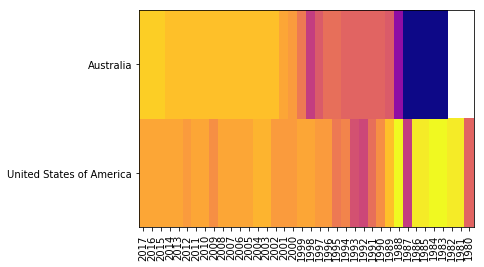

In [107]:
# https://matplotlib.org/examples/color/colormaps_reference.html
fig, ax = plt.subplots()
hm = ax.pcolormesh(combined["M1"].values, cmap='plasma')

ax.set_xticks([i+0.5 for i in range(0, len(combined["M1"].columns))])
ax.set_xticklabels(combined["M1"].columns)
for label in ax.get_xticklabels():
    label.set_rotation(90)
ax.set_yticks([i+ 0.5 for i in range(0, len(combined["M1"].index))])
ax.set_yticklabels(combined["M1"].index)

In [81]:
measles_1.applymap(lambda x: x if type(x) is not str else int(x))
# Error due to unable to a value can't be converted into int

ValueError: ("invalid literal for int() with base 10: '98 98'", 'occurred at index (M1, 2016)')

In [103]:
measles_1 = measles_1.applymap(lambda x: (x) if type(x) is not str else (int(x.split()[0]) if " " in x else int(x)))

In [104]:
measles_1.head()

Dose          M1                                                  ...        \
Year        2017 2016 2015 2014 2013 2012 2011  2010  2009  2008  ...  1989   
Afghanistan   62   62   62   60   57   59   64  62.0  60.0  59.0  ...  22.0   
Albania       96   96   97   98   99   98   99  99.0  97.0  98.0  ...  96.0   
Algeria       88   94   95   95   95   95   95  95.0  92.0  88.0  ...  82.0   
Andorra       99   97   96   96   95   98   99  99.0  98.0  98.0  ...   NaN   
Angola        42   45   51   56   59   67   60  67.0  53.0  57.0  ...  48.0   

Dose                                                               
Year         1988  1987  1986  1985  1984  1983  1982  1981  1980  
Afghanistan  34.0  31.0  14.0  14.0  14.0   9.0   8.0   NaN  11.0  
Albania      96.0  96.0  96.0  96.0  96.0  96.0  93.0  90.0  90.0  
Algeria      81.0  73.0  67.0  68.0   NaN   NaN   NaN   NaN   NaN  
Andorra       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Angola       56.0  55.0  44.0  44.0  35.0  26.0   NaN   NaN   NaN  

[5 rows x 38 columns]

[Text(0, 0, 'Afghanistan'),
 Text(0, 0, 'Albania'),
 Text(0, 0, 'Algeria'),
 Text(0, 0, 'Andorra'),
 Text(0, 0, 'Angola'),
 Text(0, 0, 'Antigua and Barbuda'),
 Text(0, 0, 'Argentina'),
 Text(0, 0, 'Armenia'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Azerbaijan'),
 Text(0, 0, 'Bahamas'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Bangladesh'),
 Text(0, 0, 'Barbados'),
 Text(0, 0, 'Belarus'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Belize'),
 Text(0, 0, 'Benin'),
 Text(0, 0, 'Bhutan'),
 Text(0, 0, 'Bolivia (Plurinational State of)'),
 Text(0, 0, 'Bosnia and Herzegovina'),
 Text(0, 0, 'Botswana'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'Brunei Darussalam'),
 Text(0, 0, 'Bulgaria'),
 Text(0, 0, 'Burkina Faso'),
 Text(0, 0, 'Burundi'),
 Text(0, 0, 'Cabo Verde'),
 Text(0, 0, 'Cambodia'),
 Text(0, 0, 'Cameroon'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Central African Republic'),
 Text(0, 0, 'Chad'),
 Text(0, 0, 'Chile'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Colombia'),
 Text(0, 0, 'Comoro

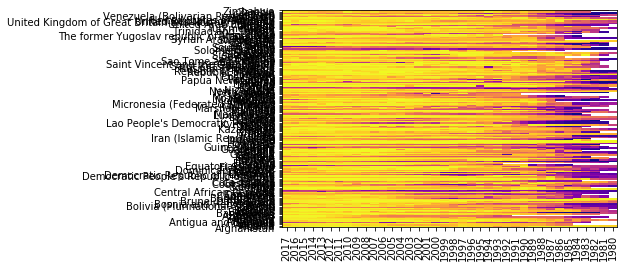

In [108]:
fig2, ax2 = plt.subplots()
hm = ax2.pcolormesh(measles_1["M1"].values, cmap='plasma')

ax2.set_xticks([i+0.5 for i in range(0, len(measles_1["M1"].columns))])
ax2.set_xticklabels(measles_1["M1"].columns)
for label in ax2.get_xticklabels():
    label.set_rotation(90)
ax2.set_yticks([i+ 0.5 for i in range(0, len(measles_1["M1"].index))])
ax2.set_yticklabels(measles_1["M1"].index)